In [1]:
import pandas as pd
import matplotlib.style as mplstyle

from funcs import *

mplstyle.use(['ggplot', 'fast'])

%load_ext autoreload
%autoreload 2

#### Part a) OLS for the Runge function

* OLS regression analysis using polynomials in x up to order 15 or higher. Add stochastic noise.
* Explore the dependence on the number of data points and the polynomial degree
* Evalute the MSE and R^2 scores. Plot them as functions of polynomial degree.
* Plot the parameters $\theta$ as you increase the order of the polynomial. Comment the results.
* You have to include a scaling/centering of the data.
* Present a critical discussion of why and how you have scaled the data.
* You have to split into test and training data.

In [ ]:
# Various number of data points and polynomial degrees
n_vals = np.arange(20, 210, 20)
p_vals = np.arange(2, 16)

In [3]:
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        X = polynomial_features(x, p, intercept=True)
        X, y = standardize(X, y)
        X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)

        theta = OLS_parameters(X_train, y_train)
        y_pred = X_test @ theta

        results.append({'n': n, 'p': p, 'theta': theta, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_OLS = pd.DataFrame(results)

Text(0.5, 0.98, 'OLS')

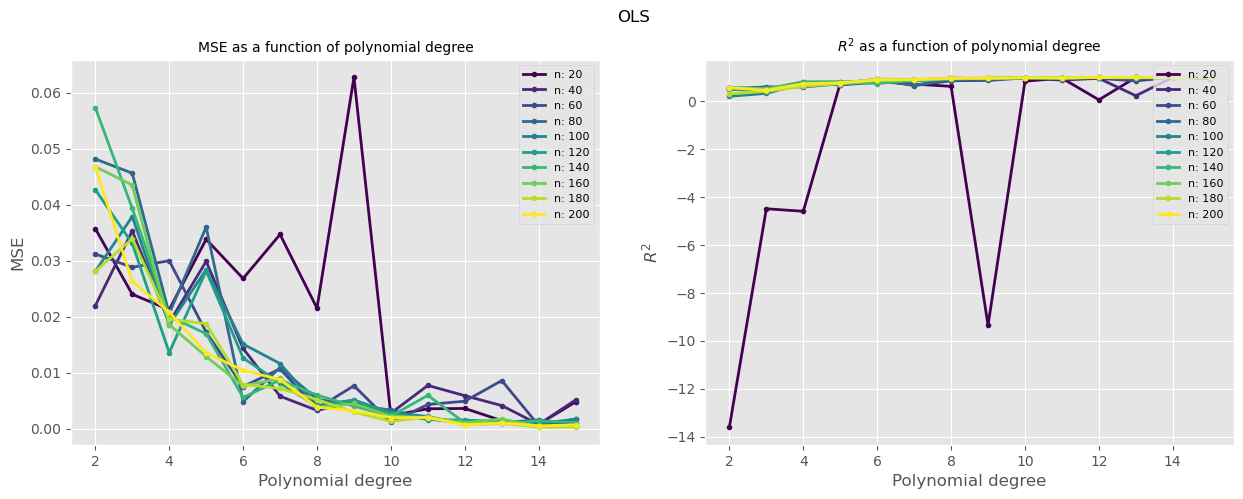

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[0].set_title('MSE as a function of polynomial degree', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[1].set_title(r'$R^2$ as a function of polynomial degree', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

Text(0.5, 0.98, 'OLS')

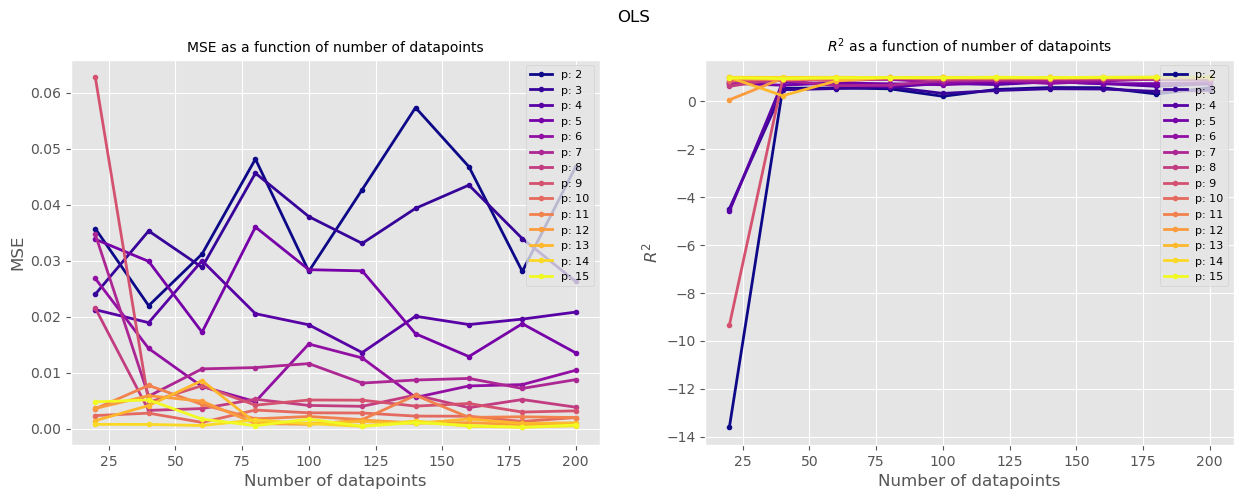

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='plasma'
num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[0].plot(p_df['n'], p_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[0].set_title('MSE as a function of number of datapoints', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Number of datapoints')
ax[0].set_ylabel('MSE')

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[1].plot(p_df['n'], p_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[1].set_title(r'$R^2$ as a function of number of datapoints', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Number of datapoints')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

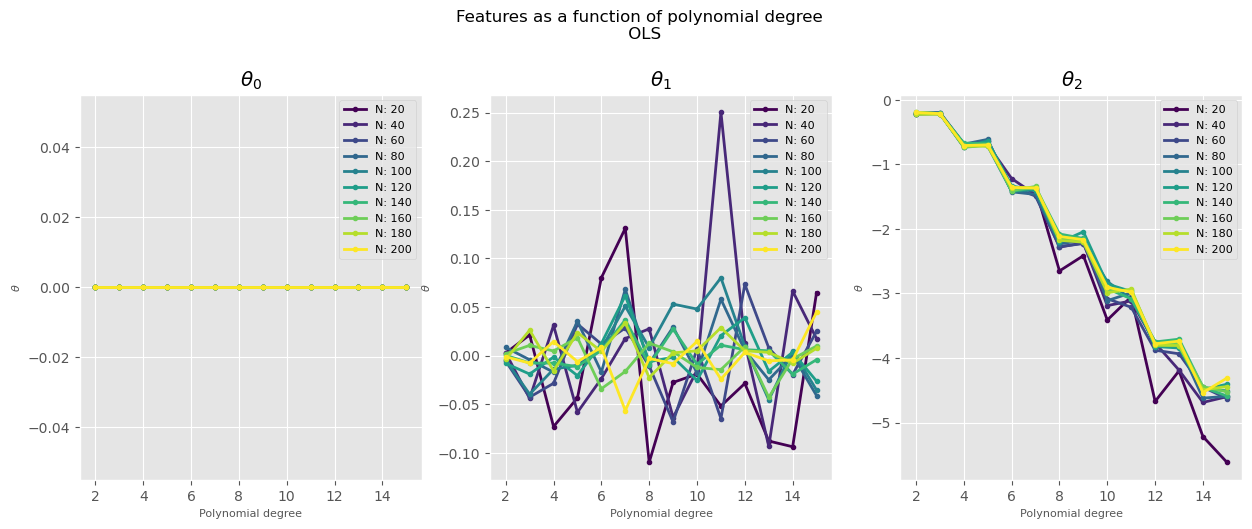

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

colormap='viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
    ax[1].plot(n_df['p'], n_df['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
    ax[2].plot(n_df['p'], n_df['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(f'Features as a function of polynomial degree \n OLS', y=1.05)

for axs in ax:
    axs.legend(loc='upper right', fontsize=8)
    axs.set_xlabel('Polynomial degree', fontsize=8)
    axs.set_ylabel(r'$\theta$', fontsize=8)

__Comment parameters__:
...

__Comment scaling method:__
...